current dir: /Users/daijunjie/code/python/llm_from_scratch/src/ipynb/transformers_hf


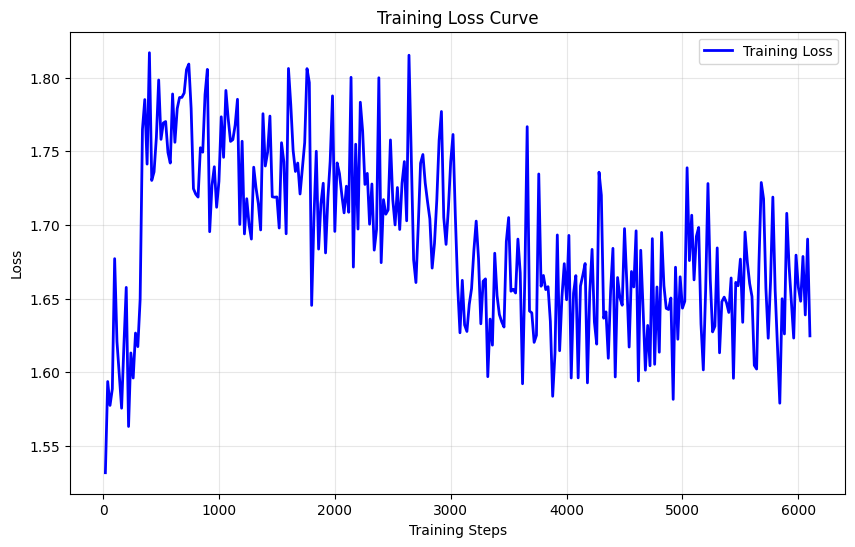

In [5]:
import json
import matplotlib.pyplot as plt
from pathlib import Path

def plot_from_logs(log_dir="./logs"):
    # 查找trainer_state.json文件
    log_path = Path(log_dir)
    import os
    print(f'current dir: {os.getcwd()}')
    state_files = list(log_path.glob("**/trainer_state.json"))
    
    if not state_files:
        print("未找到trainer_state.json文件")
        return
    
    # 读取训练状态
    with open(state_files[0], 'r') as f:
        state = json.load(f)
    
    # 提取训练数据
    steps = []
    losses = []
    
    for log_entry in state['log_history']:
        if 'loss' in log_entry:
            steps.append(log_entry['step'])
            losses.append(log_entry['loss'])
    
    # 绘制曲线
    plt.figure(figsize=(10, 6))
    plt.plot(steps, losses, 'b-', label='Training Loss', linewidth=2)
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return steps, losses

# 使用函数
steps, losses = plot_from_logs()